In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/gvrk1/Downloads/EV CLEAN DATASET.xlsx")

In [4]:
df.head()

,S.NO,FUEL,COLOR,VEHICLE CLASS CATEGORY,CATEGORY,BRAND,RTO-OFFICE,DISTRICT,REG.DATE,YEAR,MONTH
0,1,EV,ADAPT GREEN,3W Electric,Transport,ADAPT,RTA MANCHERIAL,Mancherial,2019-01-01,2019,January
1,2,EV,ADAPT GREEN,3W Electric,Transport,ADAPT,RTA NAGARKURNOOL,Nagarkurnool,2019-01-01,2019,January
2,3,EV,MEGNA GREY,2W,Non Transport,OKINAWA,RTA RANGAREDDY,Ranga Reddy,2019-01-01,2019,January
3,4,EV,ADAPT GREEN,3W Electric,Transport,ADAPT,RTA MANCHERIAL,Mancherial,2019-01-02,2019,January
4,5,EV,MEGNA GREY,2W,Non Transport,OKINAWA,RTA RANGAREDDY,Ranga Reddy,2019-01-02,2019,January


In [5]:
df.tail()

,S.NO,FUEL,COLOR,VEHICLE CLASS CATEGORY,CATEGORY,BRAND,RTO-OFFICE,DISTRICT,REG.DATE,YEAR,MONTH
264085,264086,EV,CARDAMOM GREEN DT,2W Commercial,Transport,ATHER,RTA RANGAREDDY,Ranga Reddy,2025-06-30,2025,June
264086,264087,EV,BROOKLYN BLACK,2W,Non Transport,BAJAJ,RTA KAMAREDDY,Kamareddy,2025-06-30,2025,June
264087,264088,EV,BLUE WHITE,3W Goods,Transport,MAHINDRA,RTA RANGAREDDY,Ranga Reddy,2025-06-30,2025,June
264088,264089,EV,ARIZONA_BLUE,4W,Non Transport,TATA,RTA MEDCHAL,Medchal-Malkajgiri,2025-06-30,2025,June
264089,264090,EV,CARDAMOM GREEN DT,2W Commercial,Transport,ATHER,RTA RANGAREDDY,Ranga Reddy,2025-06-30,2025,June


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264090 entries, 0 to 264089
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   S.NO                    264090 non-null  int64         
 1   FUEL                    264090 non-null  object        
 2   COLOR                   264070 non-null  object        
 3   VEHICLE CLASS CATEGORY  264090 non-null  object        
 4   CATEGORY                264090 non-null  object        
 5   BRAND                   264090 non-null  object        
 6   RTO-OFFICE              264090 non-null  object        
 7   DISTRICT                264090 non-null  object        
 8   REG.DATE                264090 non-null  datetime64[ns]
 9   YEAR                    264090 non-null  int64         
 10  MONTH                   264090 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 22.2+ MB


In [7]:
df.isnull().sum()

S.NO                       0
FUEL                       0
COLOR                     20
VEHICLE CLASS CATEGORY     0
CATEGORY                   0
BRAND                      0
RTO-OFFICE                 0
DISTRICT                   0
REG.DATE                   0
YEAR                       0
MONTH                      0
dtype: int64

In [9]:
df['COLOR'] = df['COLOR'].fillna('UNKNOWN')


In [10]:
df.isnull().sum()

S.NO                      0
FUEL                      0
COLOR                     0
VEHICLE CLASS CATEGORY    0
CATEGORY                  0
BRAND                     0
RTO-OFFICE                0
DISTRICT                  0
REG.DATE                  0
YEAR                      0
MONTH                     0
dtype: int64

In [11]:
# Summary statistics (only for numerical columns)
df.describe()

# Unique counts for categorical variables
categorical_cols = ['COLOR', 'VEHICLE CLASS CATEGORY', 'CATEGORY', 'BRAND', 'RTO-OFFICE', 'DISTRICT', 'YEAR', 'MONTH']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


COLOR: 2257 unique values
VEHICLE CLASS CATEGORY: 10 unique values
CATEGORY: 2 unique values
BRAND: 113 unique values
RTO-OFFICE: 59 unique values
DISTRICT: 57 unique values
YEAR: 7 unique values
MONTH: 12 unique values


In [12]:
df.columns

Index(['S.NO', 'FUEL', 'COLOR', 'VEHICLE CLASS CATEGORY', 'CATEGORY', 'BRAND',
       'RTO-OFFICE', 'DISTRICT', 'REG.DATE', 'YEAR', 'MONTH'],
      dtype='object')

In [13]:
df.dtypes

S.NO                               int64
FUEL                              object
COLOR                             object
VEHICLE CLASS CATEGORY            object
CATEGORY                          object
BRAND                             object
RTO-OFFICE                        object
DISTRICT                          object
REG.DATE                  datetime64[ns]
YEAR                               int64
MONTH                             object
dtype: object

<Axes: >

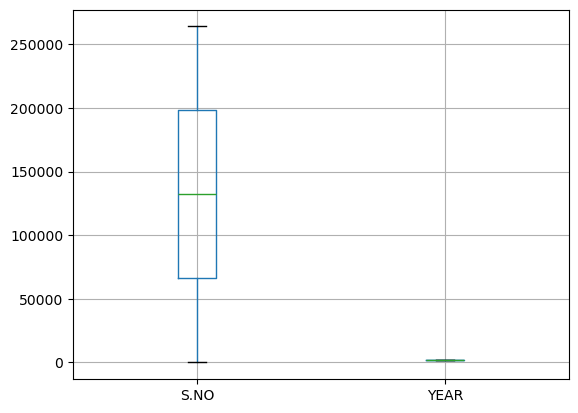

In [14]:
df.boxplot()

## Basic Visualizations (Univariate Analysis)
#### Brand Distribution

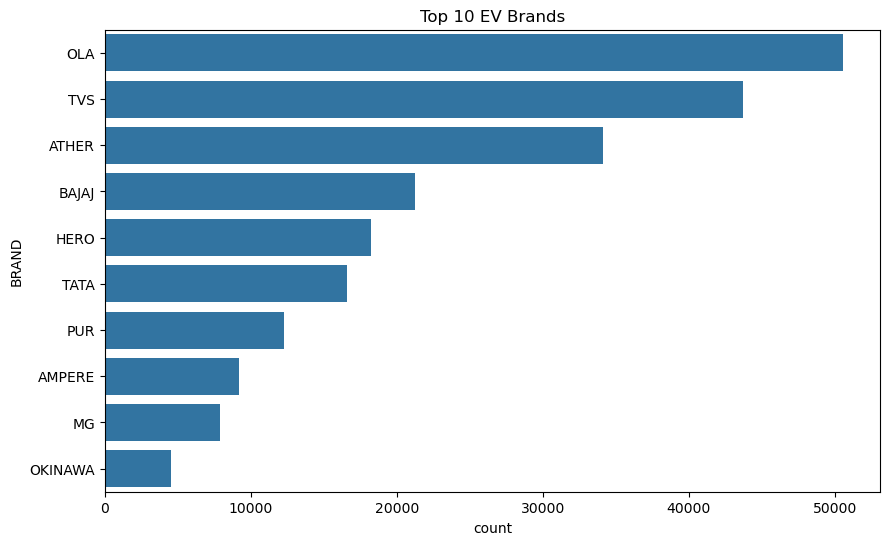

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='BRAND', order=df['BRAND'].value_counts().head(10).index)
plt.title("Top 10 EV Brands")
plt.show()

#### Vehicle Category Distribution

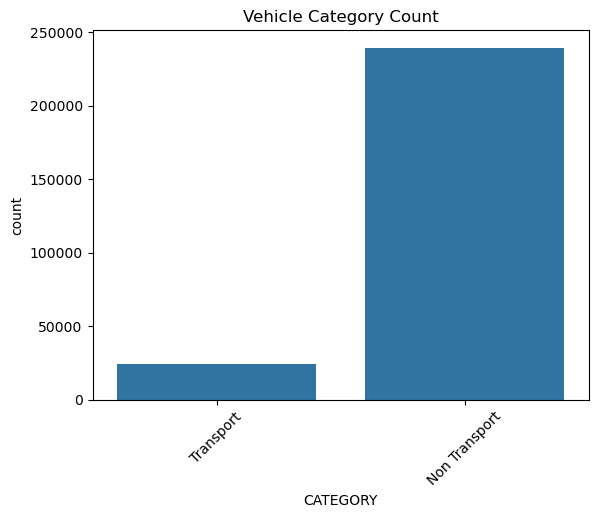

In [19]:
sns.countplot(data=df, x='CATEGORY')
plt.title("Vehicle Category Count")
plt.xticks(rotation=45)
plt.show()

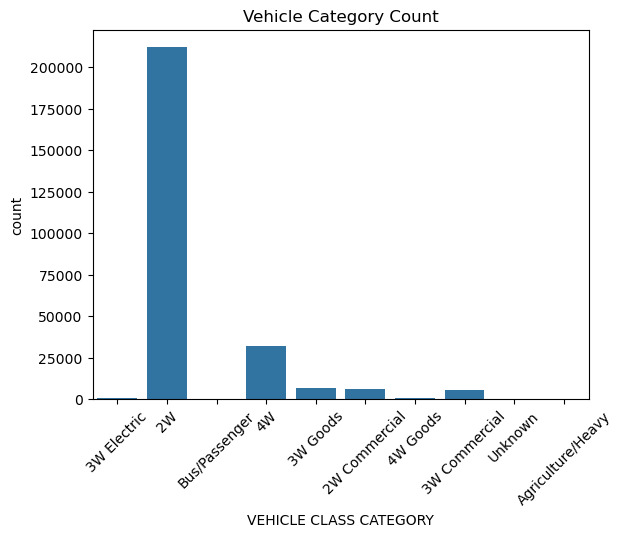

In [20]:
sns.countplot(data=df, x='VEHICLE CLASS CATEGORY')
plt.title("Vehicle Category Count")
plt.xticks(rotation=45)
plt.show()

#### EV Registrations by Year

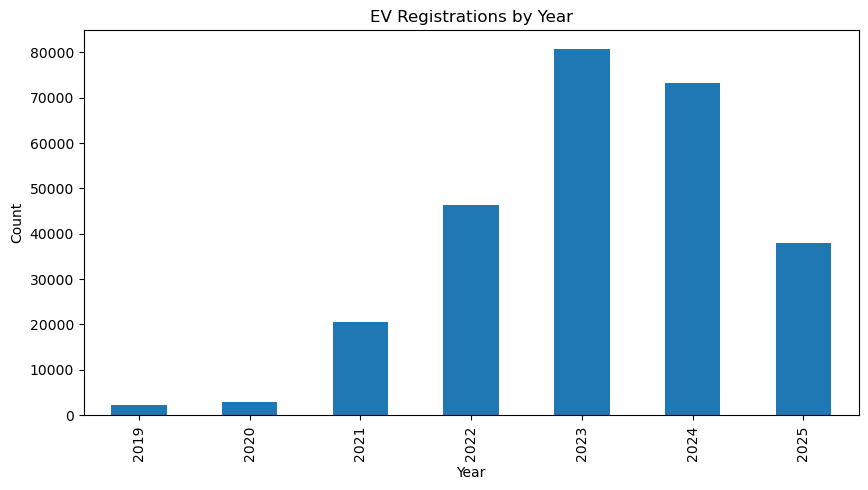

In [21]:
ev_yearly = df['YEAR'].value_counts().sort_index()
ev_yearly.plot(kind='bar', figsize=(10,5), title='EV Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### EV Registrations by Month

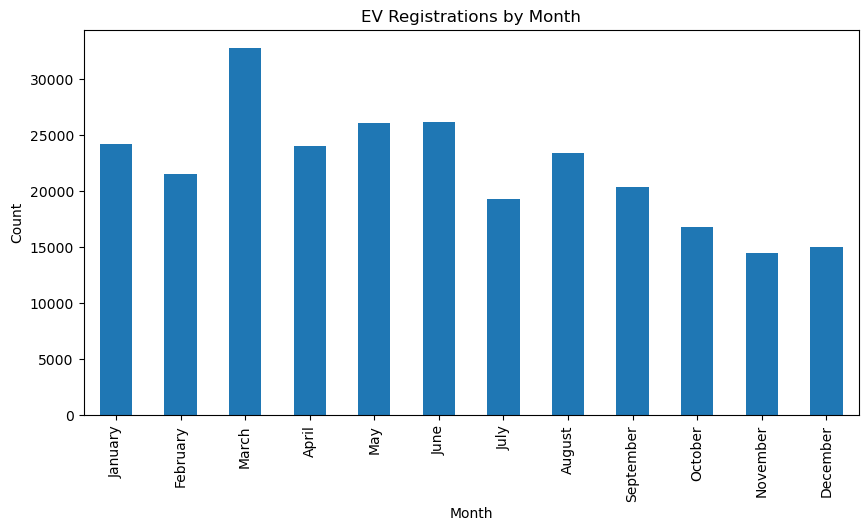

In [23]:
# 1. Define the correct order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 2. Convert the 'MONTH' column to a categorical type with the correct order
df['MONTH'] = pd.Categorical(df['MONTH'], categories=month_order, ordered=True)

# 3. Now, when you plot, the order will be correct.
ev_monthly = df['MONTH'].value_counts().sort_index()

ev_monthly.plot(kind='bar', figsize=(10,5), title='EV Registrations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264090 entries, 0 to 264089
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   S.NO                    264090 non-null  int64         
 1   FUEL                    264090 non-null  object        
 2   COLOR                   264090 non-null  object        
 3   VEHICLE CLASS CATEGORY  264090 non-null  object        
 4   CATEGORY                264090 non-null  object        
 5   BRAND                   264090 non-null  object        
 6   RTO-OFFICE              264090 non-null  object        
 7   DISTRICT                264090 non-null  object        
 8   REG.DATE                264090 non-null  datetime64[ns]
 9   YEAR                    264090 non-null  int64         
 10  MONTH                   264090 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 20.4+ MB
None


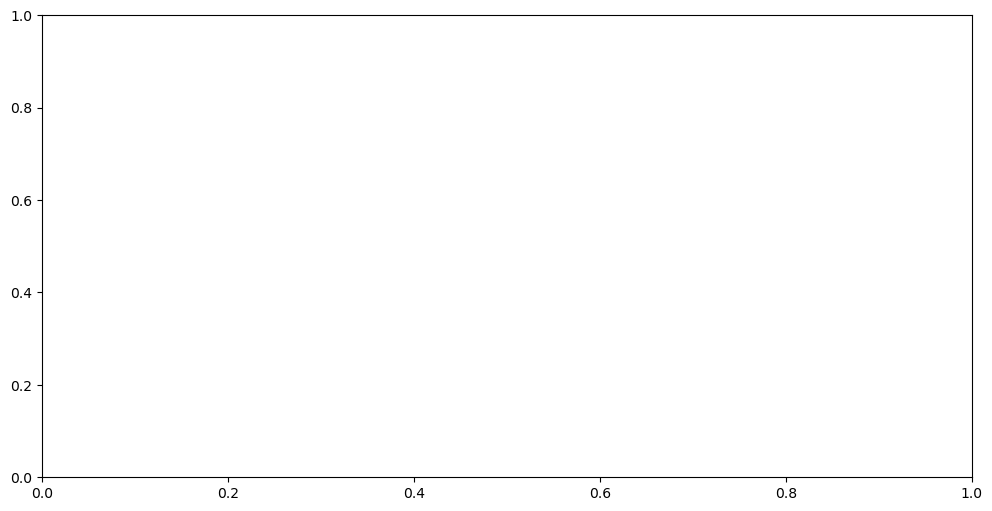

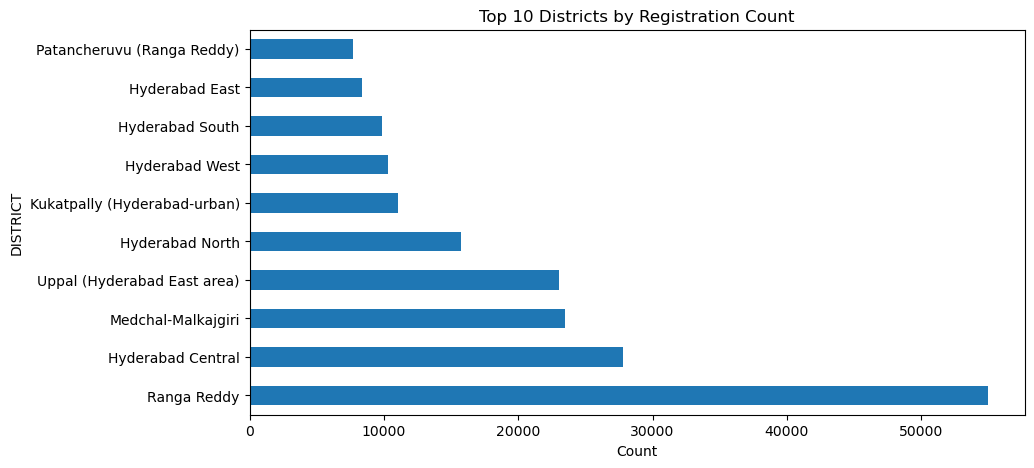

In [27]:
top_districts = df['DISTRICT'].value_counts().head(10)
top_districts.plot(kind='barh', figsize=(10,5), title='Top 10 Districts by Registration Count')
plt.xlabel('Count')
plt.show()